In [15]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [16]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 4)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rn7'
load(file.path(GENOMEDIR,'rn7_liftoff_mm10NcbiRefSeq_ArchR_annotations.rda'))

Setting default number of Parallel threads to 4.



In [17]:
PROJDIR='/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'Rat_Transgen_NAc_scATAC')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

In [8]:
names(getCellColData(proj))

[1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "DoubletScore"      "DoubletEnrichment" "BlacklistRatio"   
[16] "Sire"              "ClustersI200_ATAC"

In [4]:
varFeat = 200
pd = getCellColData(proj)
dimRed = names(attributes(proj)$reducedDims)
embedNames = names(attributes(proj)$embeddings)

iterLSIName = paste0("IterativeLSI",varFeat,'_ATAC')
print(iterLSIName)
if (iterLSIName %ni% dimRed){
  pdf()
  proj <- addIterativeLSI( proj, useMatrix = "TileMatrix", 
                           name = iterLSIName,
                           LSIMethod = 2, 
                           iterations = 4, # increase this if noticing subtle batch effects
                           scaleTo = 20000, # median unique fragment per cell
                           selectionMethod = 'var',
                           clusterParams = list( # See Seurat::FindClusters
                             resolution = .2, # lower this if noticing subtle batch effects
                             sampleCells = 10000,  n.start = 10), 
                           varFeatures = varFeat * 1000, # also can reduce this if noticing subtle batch effects
                           dimsToUse = 1:30, force = FALSE)
  dev.off()
  proj = saveArchRProject(ArchRProj = proj)}


[1] "IterativeLSI200_ATAC"


Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-18688572baaed-Date-2022-11-08_Time-00-54-19.log
If there is an issue, please report to github with logFile!

2022-11-08 00:54:25 : Computing Total Across All Features, 0.043 mins elapsed.

2022-11-08 00:54:35 : Computing Top Features, 0.21 mins elapsed.

###########
2022-11-08 00:54:36 : Running LSI (1 of 4) on Top Features, 0.224 mins elapsed.
###########

2022-11-08 00:54:37 : Sampling Cells (N = 10003) for Estimated LSI, 0.256 mins elapsed.

2022-11-08 00:54:37 : Creating Sampled Partial Matrix, 0.256 mins elapsed.

2022-11-08 00:56:08 : Computing Estimated LSI (projectAll = FALSE), 1.761 mins elapsed.

2022-11-08 01:01:18 : Identifying Clusters, 6.924 mins elapsed.

2022-11-08 01:01:52 : Identified 6 Clusters, 7.498 mins elapsed.

2022-11-08 01:01:52 : Saving LSI Iteration, 7.498 mins elapsed.



2022-11-08 01:02:23 : Creating Cluster Matrix on the total Group Features, 8.007 mins elapsed.

2022-11-08 01:03:45 :

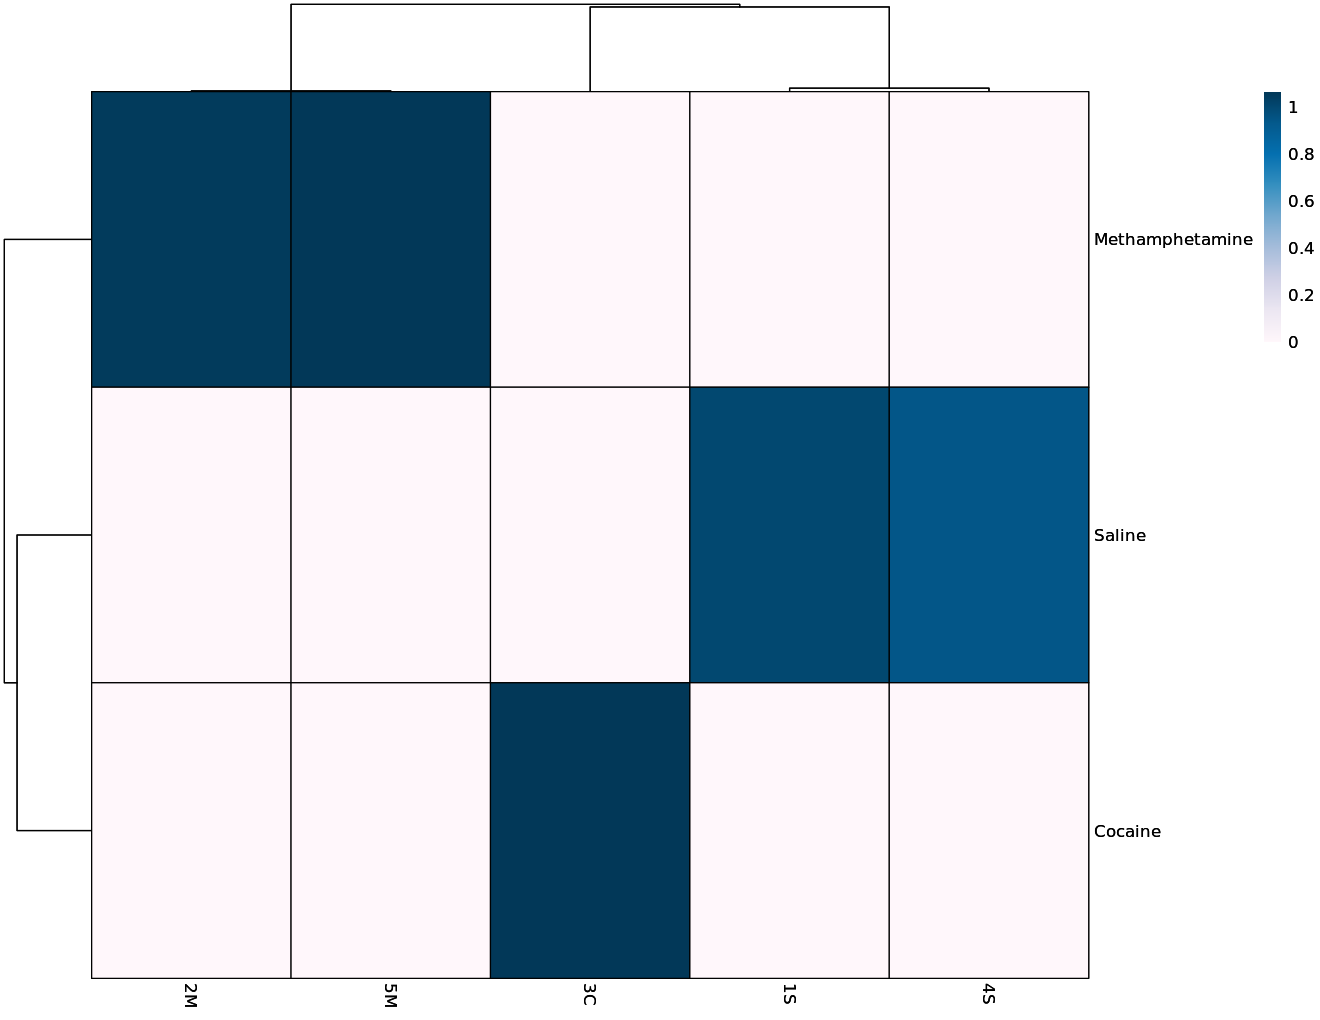

In [5]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$Sire), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [19]:
UMAPName = paste0("UMAPI",varFeat,'_ATAC')
if (UMAPName %ni% embedNames){
  print(UMAPName)
  proj <- addUMAP(proj, reducedDims = iterLSIName, 
                  name = UMAPName, nNeighbors = 30, minDist = 0.5, 
                  metric = "cosine", force = F)}

[1] "UMAPI200_ATAC"


12:12:42 UMAP embedding parameters a = 0.583 b = 1.334

12:12:42 Read 43786 rows and found 30 numeric columns

12:12:42 Using Annoy for neighbor search, n_neighbors = 30

12:12:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:12:48 Writing NN index file to temp file /tmp/Rtmp6IwUHL/file1868873298f44

12:12:48 Searching Annoy index using 16 threads, search_k = 3000

12:13:00 Annoy recall = 100%

12:13:01 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 30

12:13:03 Initializing from normalized Laplacian + noise (using irlba)

12:13:06 Commencing optimization for 200 epochs, with 2173734 positive edges

12:14:20 Optimization finished

12:14:20 Creating temp model dir /tmp/Rtmp6IwUHL/dir186886227a4b8

12:14:20 Creating dir /tmp/R

In [20]:
# add clusters
ClustersName = paste0("ClustersI",varFeat,'_ATAC')
if (ClustersName %ni% names(pd)){
  print(ClustersName)
  proj <- addClusters(proj, reducedDims = iterLSIName, method = "Seurat", 
                      algorithm = 2,
                      filterBias = TRUE, name = ClustersName, resolution = 1, force = T)
  }

[1] "ClustersI200_ATAC"


ArchR logging to : ArchRLogs/ArchR-addClusters-1868826287ef9-Date-2022-11-08_Time-12-14-46.log
If there is an issue, please report to github with logFile!

2022-11-08 12:14:46 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 43786
Number of edges: 1339206

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8235
Number of communities: 19
Elapsed time: 8 seconds


4 singletons identified. 15 final clusters.

2022-11-08 12:15:47 : Testing Biased Clusters, 1.022 mins elapsed.

2022-11-08 12:15:47 : Testing Outlier Clusters, 1.023 mins elapsed.

2022-11-08 12:15:48 : Assigning Cluster Names to 15 Clusters, 1.023 mins elapsed.

2022-11-08 12:15:48 : Finished addClusters, 1.025 mins elapsed.



In [21]:
# add Harmony batch correction
HarmonyName = paste0("HarmonyI",varFeat,'_ATAC')
if (HarmonyName %ni% dimRed ){
  print(HarmonyName)
  proj <- addHarmony(proj, reducedDims = iterLSIName, 
                     max.iter.harmony = 15, name = HarmonyName, 
                     groupBy = c('Sample','Sire'), force = T)}

[1] "HarmonyI200_ATAC"


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2189300)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2189300)”
Warning message:
“did not converge in 25 iterations”
Warning message:
“did not converge in 25 iterations”
Harmony 1/15

Harmony 2/15

Harmony 3/15

Harmony converged after 3 iterations



In [22]:
# add umap
UMAPName2 = paste0("UMAPH",varFeat,'_ATAC')
if (UMAPName2 %ni% embedNames){
  print(UMAPName2)
  proj <- addUMAP(proj, reducedDims = HarmonyName, 
                  name = UMAPName2, nNeighbors = 30, minDist = 0.5, 
                  metric = "cosine", force = F)}

[1] "UMAPH200_ATAC"


12:17:45 UMAP embedding parameters a = 0.583 b = 1.334

12:17:45 Read 43786 rows and found 30 numeric columns

12:17:45 Using Annoy for neighbor search, n_neighbors = 30

12:17:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:17:50 Writing NN index file to temp file /tmp/Rtmp6IwUHL/file18688f5b85d5

12:17:50 Searching Annoy index using 16 threads, search_k = 3000

12:18:02 Annoy recall = 100%

12:18:04 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 30

12:18:06 Initializing from normalized Laplacian + noise (using irlba)

12:18:09 Commencing optimization for 200 epochs, with 2181274 positive edges

12:19:28 Optimization finished

12:19:29 Creating temp model dir /tmp/Rtmp6IwUHL/dir186884485bdd5

12:19:29 Creating dir /tmp/Rt

In [26]:
# add clusters
ClustersName2 = paste0("ClustersH",varFeat,'_ATAC')
if (ClustersName2 %ni% names(pd)){
  print(ClustersName2)
  proj <- addClusters(proj, reducedDims = HarmonyName, method = "Seurat", 
                      algorithm = 2, 
                      name = ClustersName2, resolution = 1, force = T)}

[1] "ClustersH200_ATAC"


ArchR logging to : ArchRLogs/ArchR-addClusters-1868832d2cf62-Date-2022-11-08_Time-12-22-24.log
If there is an issue, please report to github with logFile!

2022-11-08 12:22:25 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 43786
Number of edges: 1295397

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 29
Elapsed time: 9 seconds


13 singletons identified. 16 final clusters.

2022-11-08 12:23:30 : Testing Biased Clusters, 1.085 mins elapsed.

2022-11-08 12:23:31 : Testing Outlier Clusters, 1.108 mins elapsed.

2022-11-08 12:23:31 : Assigning Cluster Names to 16 Clusters, 1.108 mins elapsed.

2022-11-08 12:23:32 : Finished addClusters, 1.128 mins elapsed.



In [27]:
proj = addImputeWeights(proj, reducedDims = HarmonyName)
proj = saveArchRProject(ArchRProj = proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-186887ea5c6f-Date-2022-11-08_Time-12-24-34.log
If there is an issue, please report to github with logFile!

2022-11-08 12:24:35 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1868822c8c496-Date-2022-11-08_Time-12-26-21.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1868822c8c496-Date-2022-11-08_Time-12-26-21.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1868861589bdf-Date-2022-11-08_Time-12-26-38.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1868861589bdf-Date-2022-11-08_Time-12-26-38.log



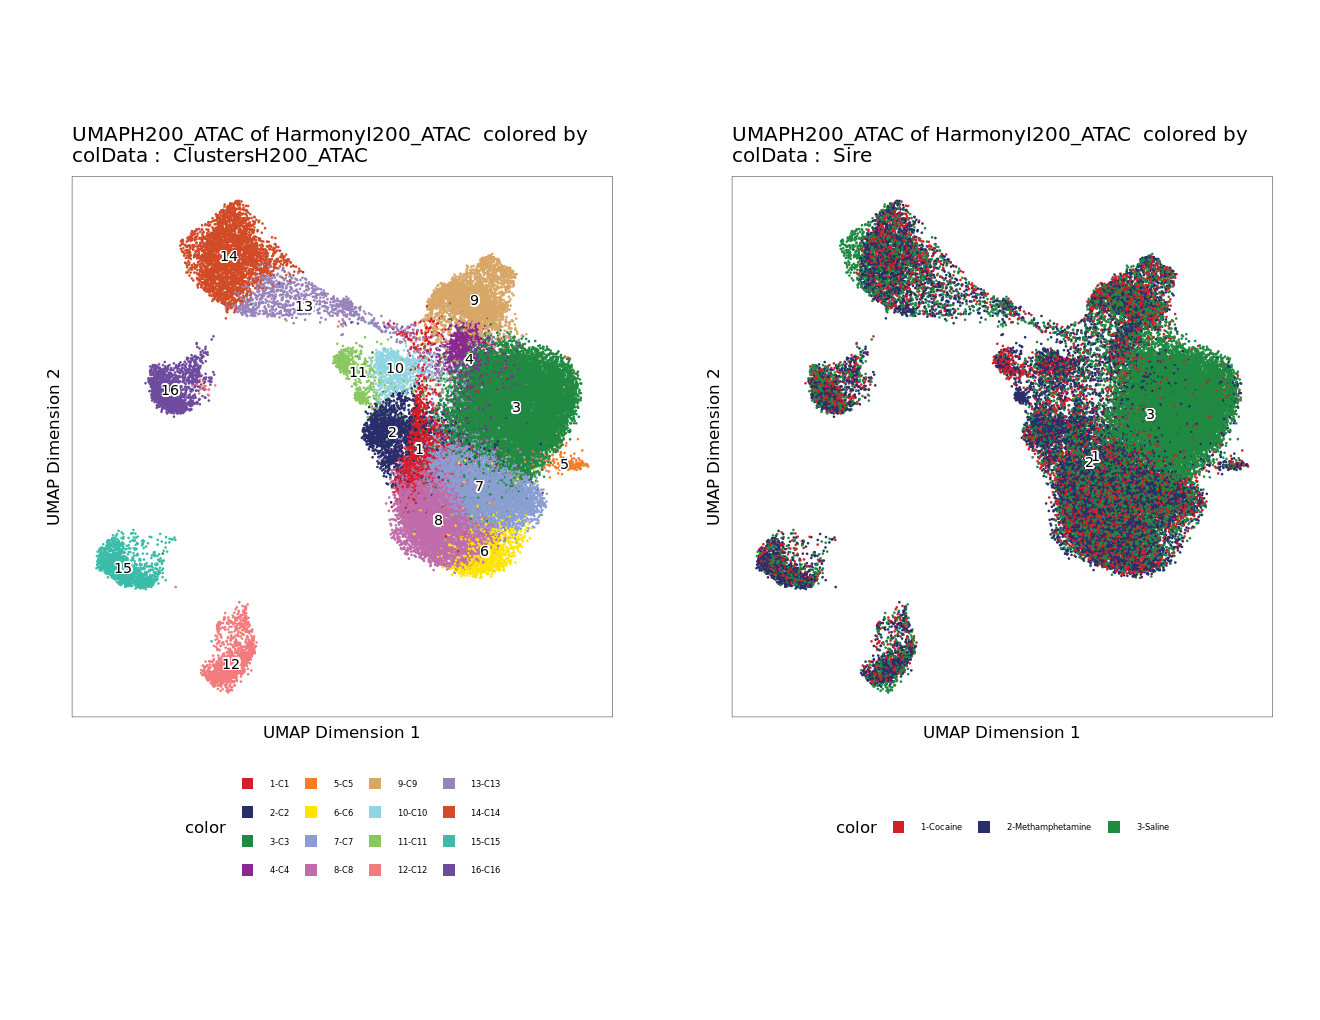

In [28]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200_ATAC", embedding = "UMAPH200_ATAC")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sire", embedding = "UMAPH200_ATAC")
                    
ggAlignPlots(p1, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-186884e4dc4d7-Date-2022-11-08_Time-12-27-24.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-186884e4dc4d7-Date-2022-11-08_Time-12-27-24.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-186883ccbf250-Date-2022-11-08_Time-12-27-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-186883ccbf250-Date-2022-11-08_Time-12-27-26.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-186881a4a937-Date-2022-11-08_Time-12-27-31.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-186881a4a937-Date-2022-11-08_Tim

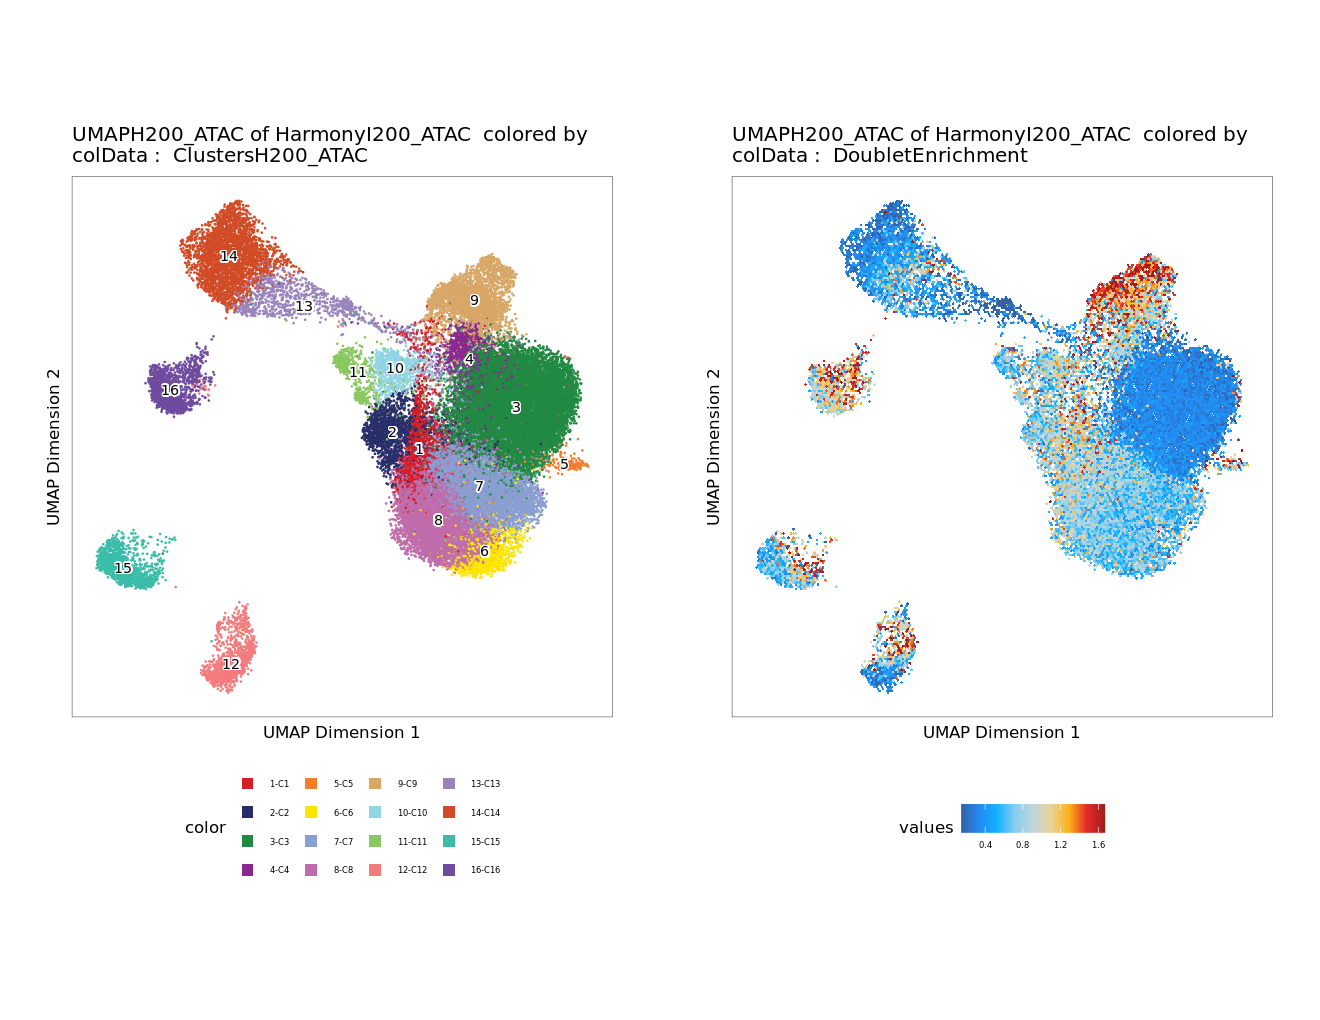

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-18688708f5b40-Date-2022-11-08_Time-12-27-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-18688708f5b40-Date-2022-11-08_Time-12-27-36.log



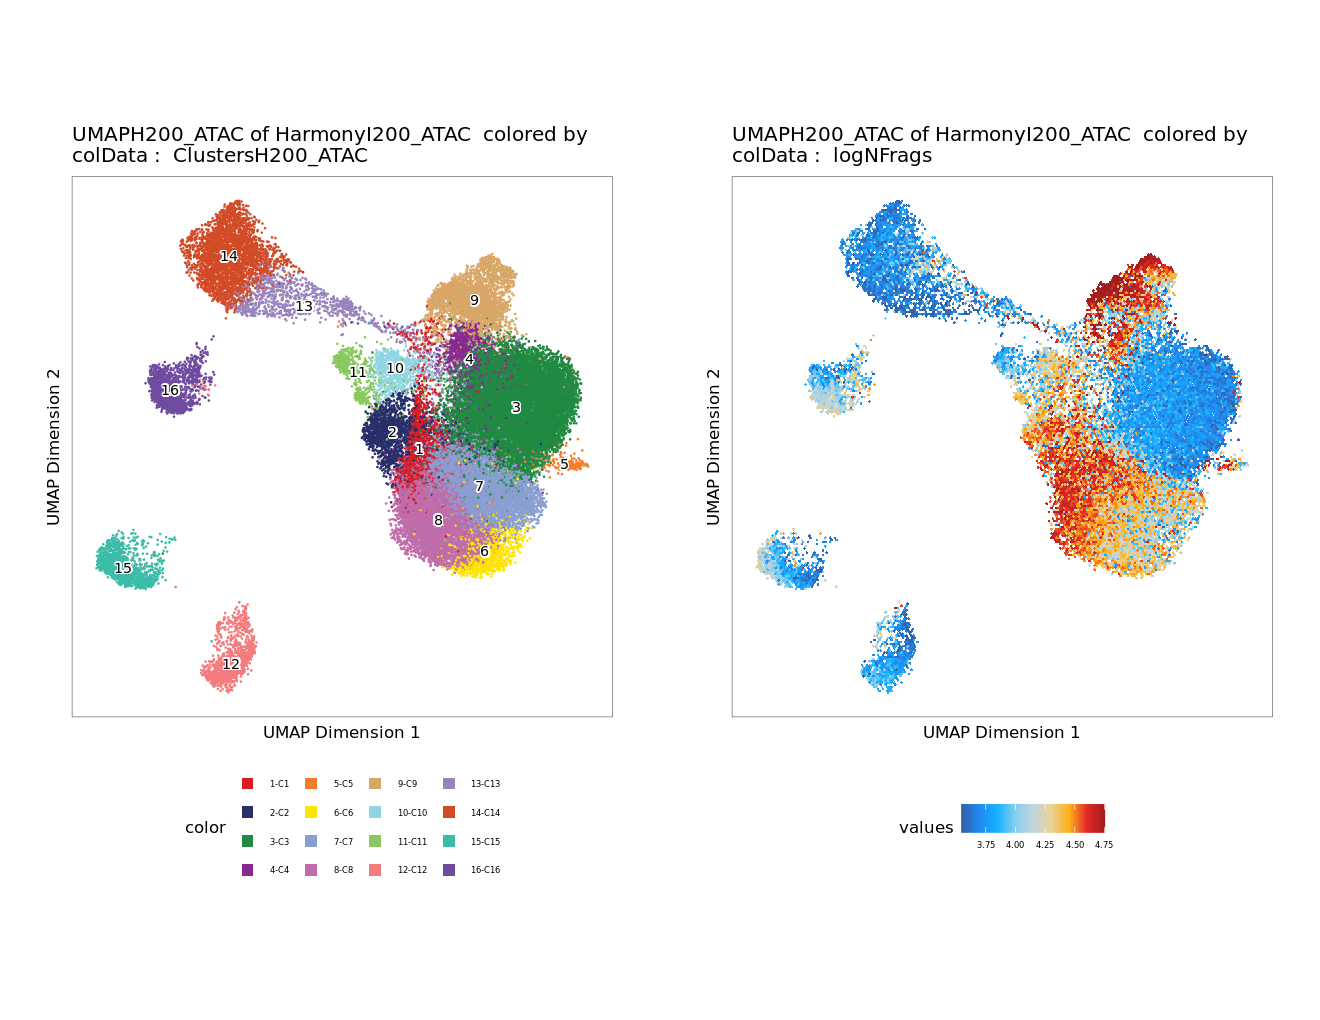

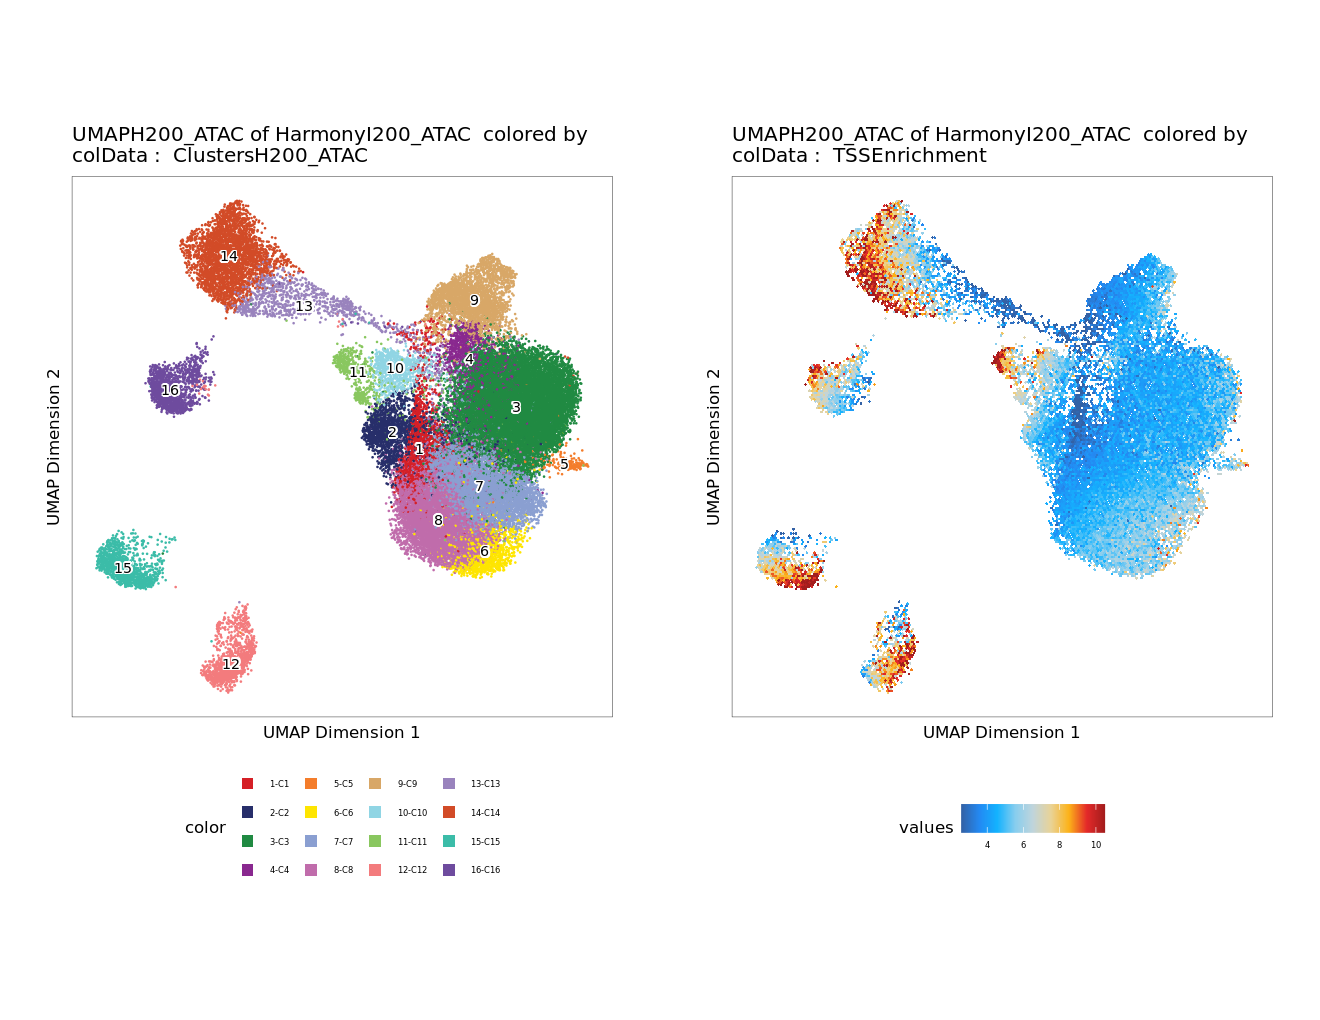

In [29]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200_ATAC", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2, type = "h")

proj$logNFrags = log10(proj$nFrags)

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p3, type = "h")

p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "TSSEnrichment", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p4, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-41da1f333ef9-Date-2022-01-07_Time-08-43-59.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-01-07 08:43:59 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-41da1f333ef9-Date-2022-01-07_Time-08-43-59.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use

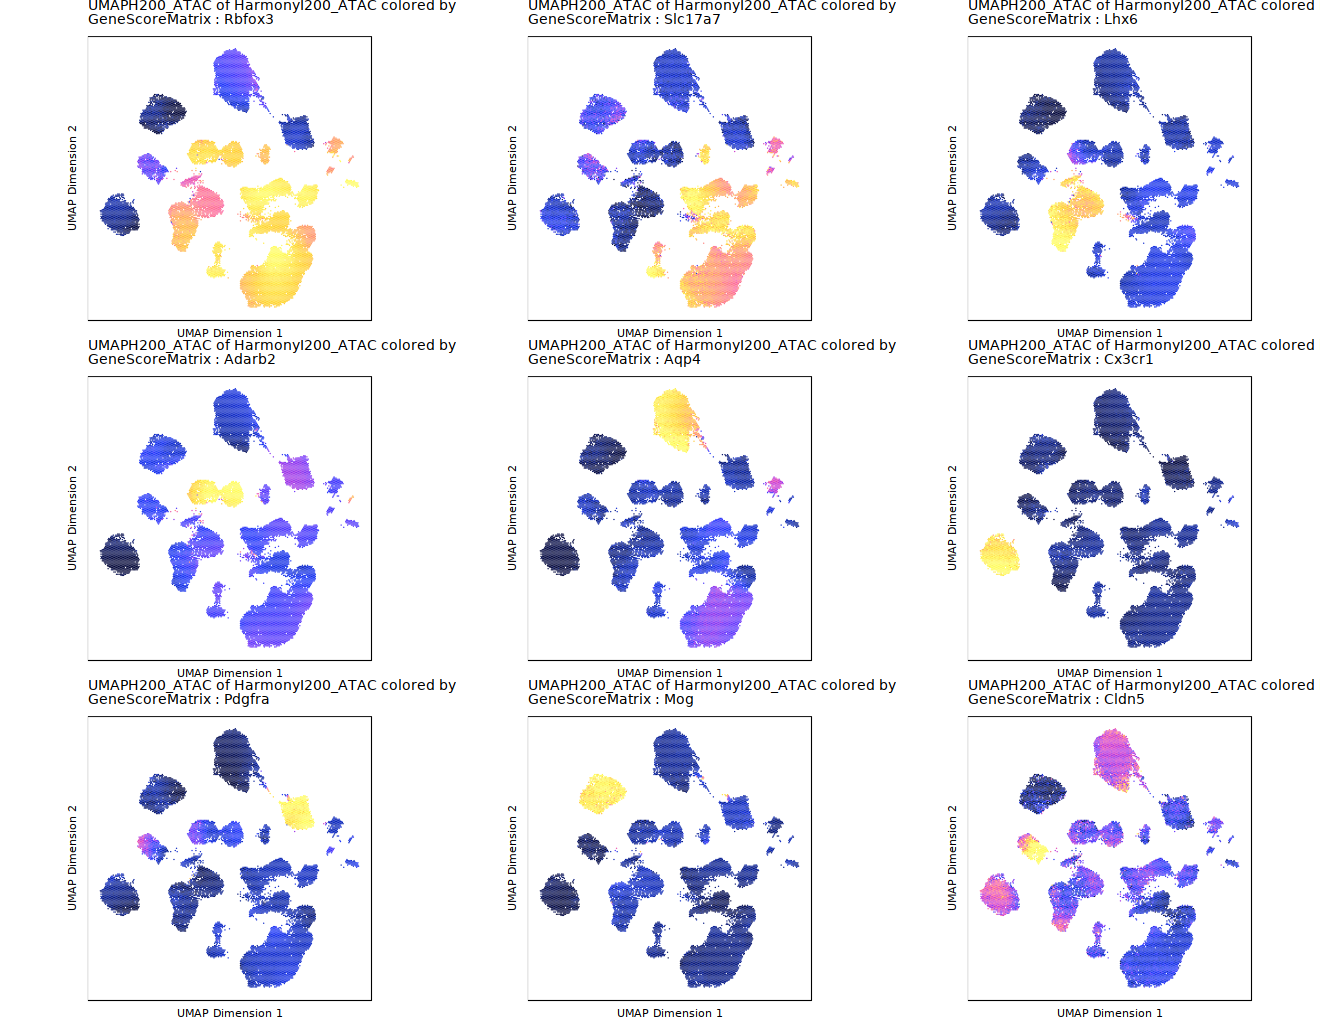

In [8]:
## Neuron vs. Glia markers
markerGenes1  <- c('CPNE4', # Neurons
                   'RXFP1', # Excitatory Neurons
                   'GREB1L', #MGE Interneurons
                   'ARHGAP6', #CGE Interneurons
                   'GRIA4', # Astrocyte
                   'DRD1', # Microglia
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-41da7d020b44-Date-2022-01-07_Time-08-45-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-01-07 08:45:28 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-41da7d020b44-Date-2022-01-07_Time-08-45-28.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `g

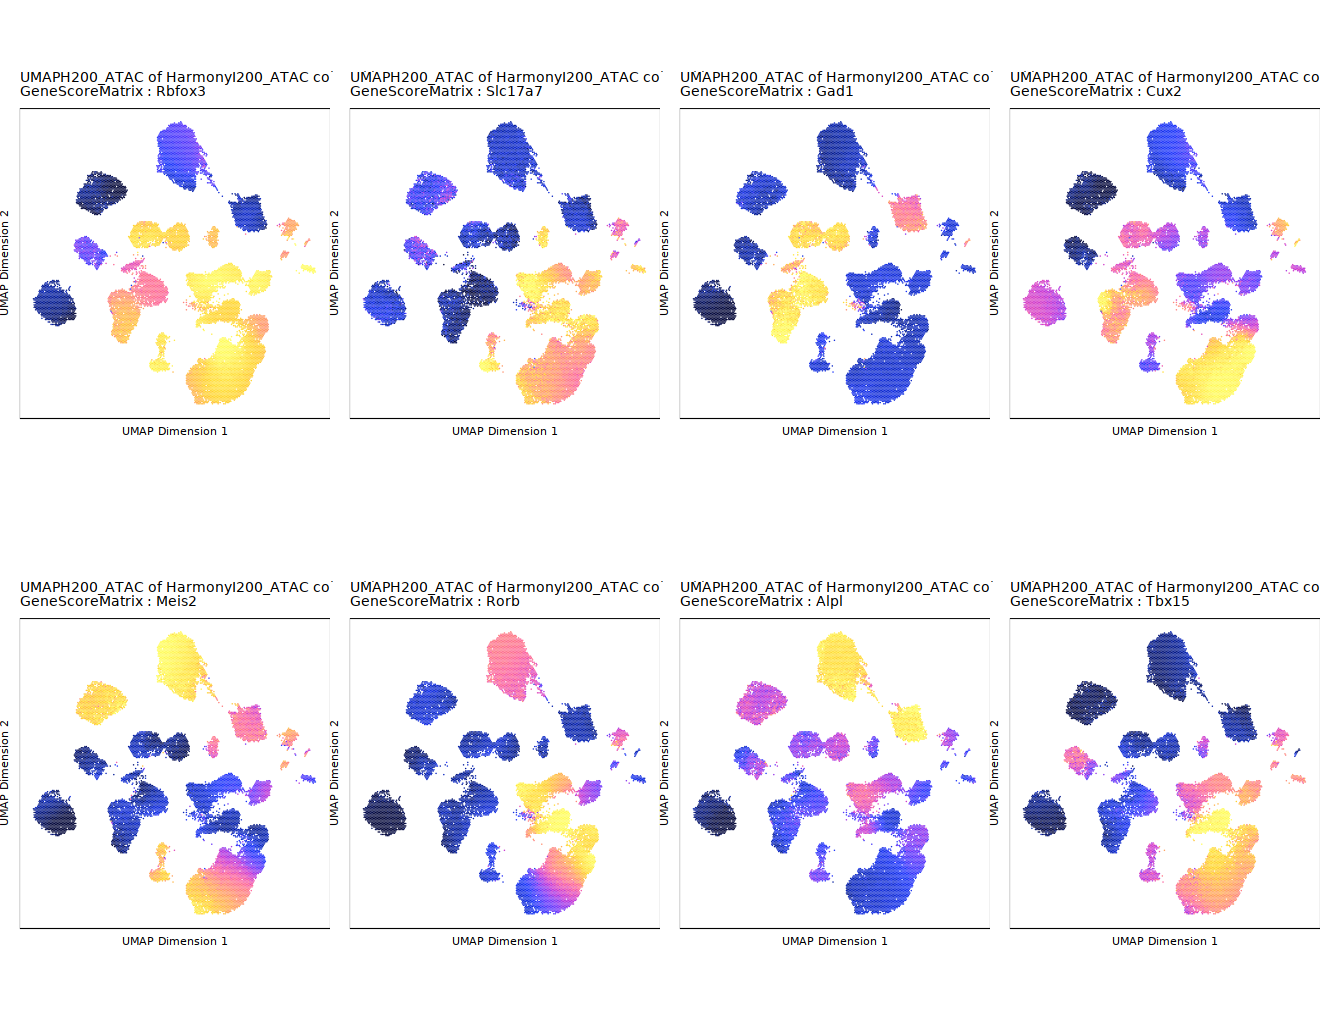

In [9]:
## plot Excitatory neuron markers for major class and upper layers
markerGenes1  <- c(
'Rbfox3', 'Slc17a7', 'Gad1', # Main classes
'Cux2', 'Meis2', "Rorb", # L3/ L4 IT
"Alpl", 'Tbx15') # L4/5)

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow =2),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-41da8282cd6-Date-2022-01-07_Time-08-46-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-01-07 08:46:38 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-41da8282cd6-Date-2022-01-07_Time-08-46-37.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `gui

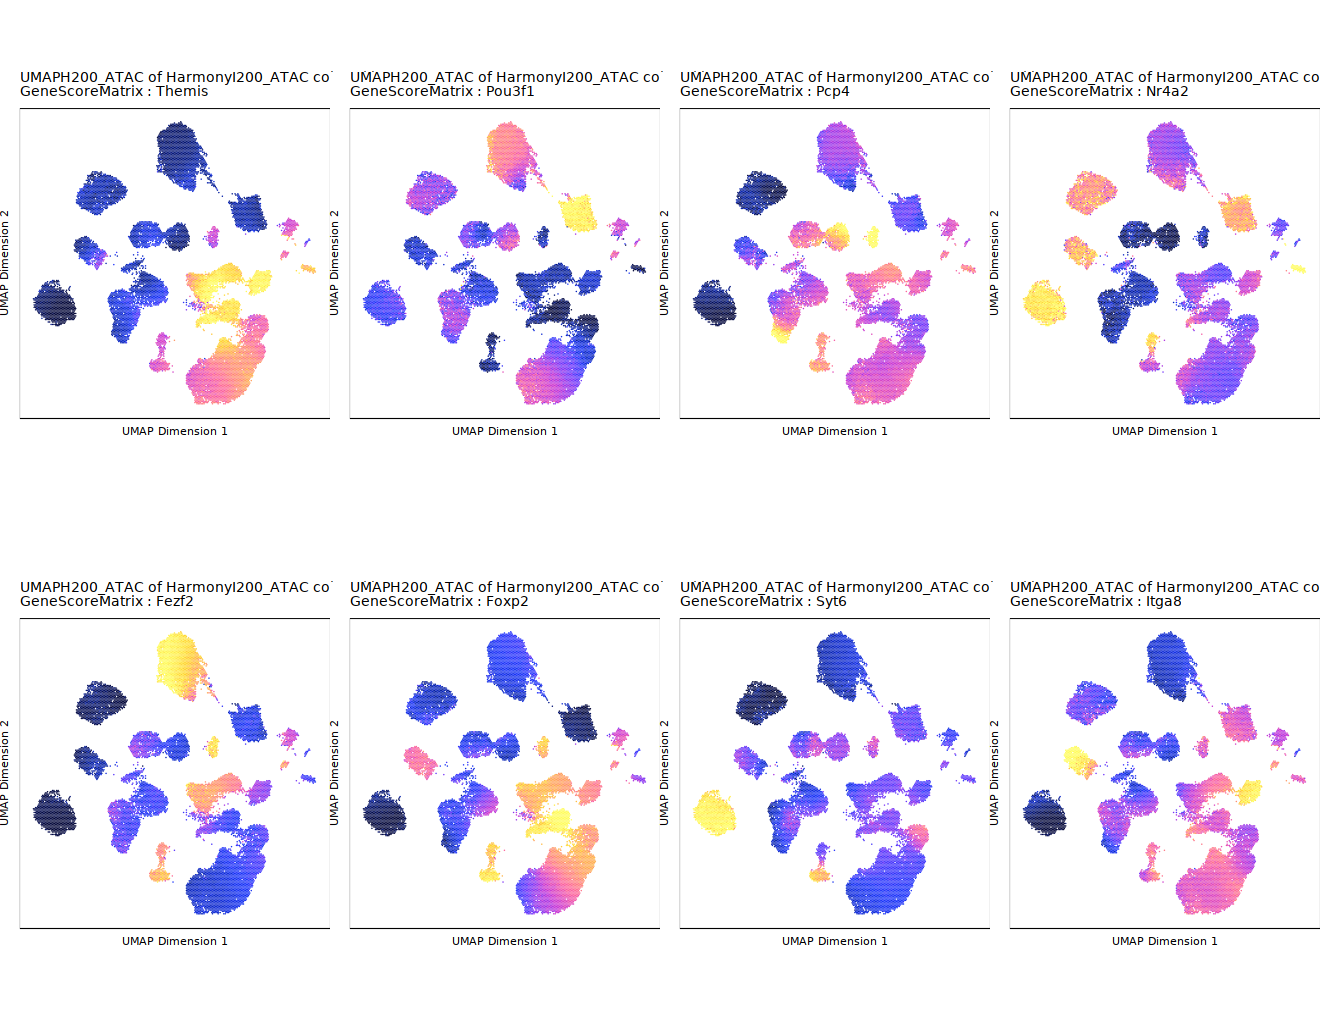

In [10]:
## plot Excitatory neuron markers for deeper layers
markerGenes1  <- c(
'Themis', # Car3 and L6 IT
'Pou3f1', 'Pcp4', 'Nr4a2', # L5
'Fezf2', 'Foxp2',# NP and L6, L5 ET
'Syt6',  'Itga8' #L6
)

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-41da307e192b-Date-2022-01-07_Time-08-47-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-01-07 08:47:37 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-41da307e192b-Date-2022-01-07_Time-08-47-37.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `g

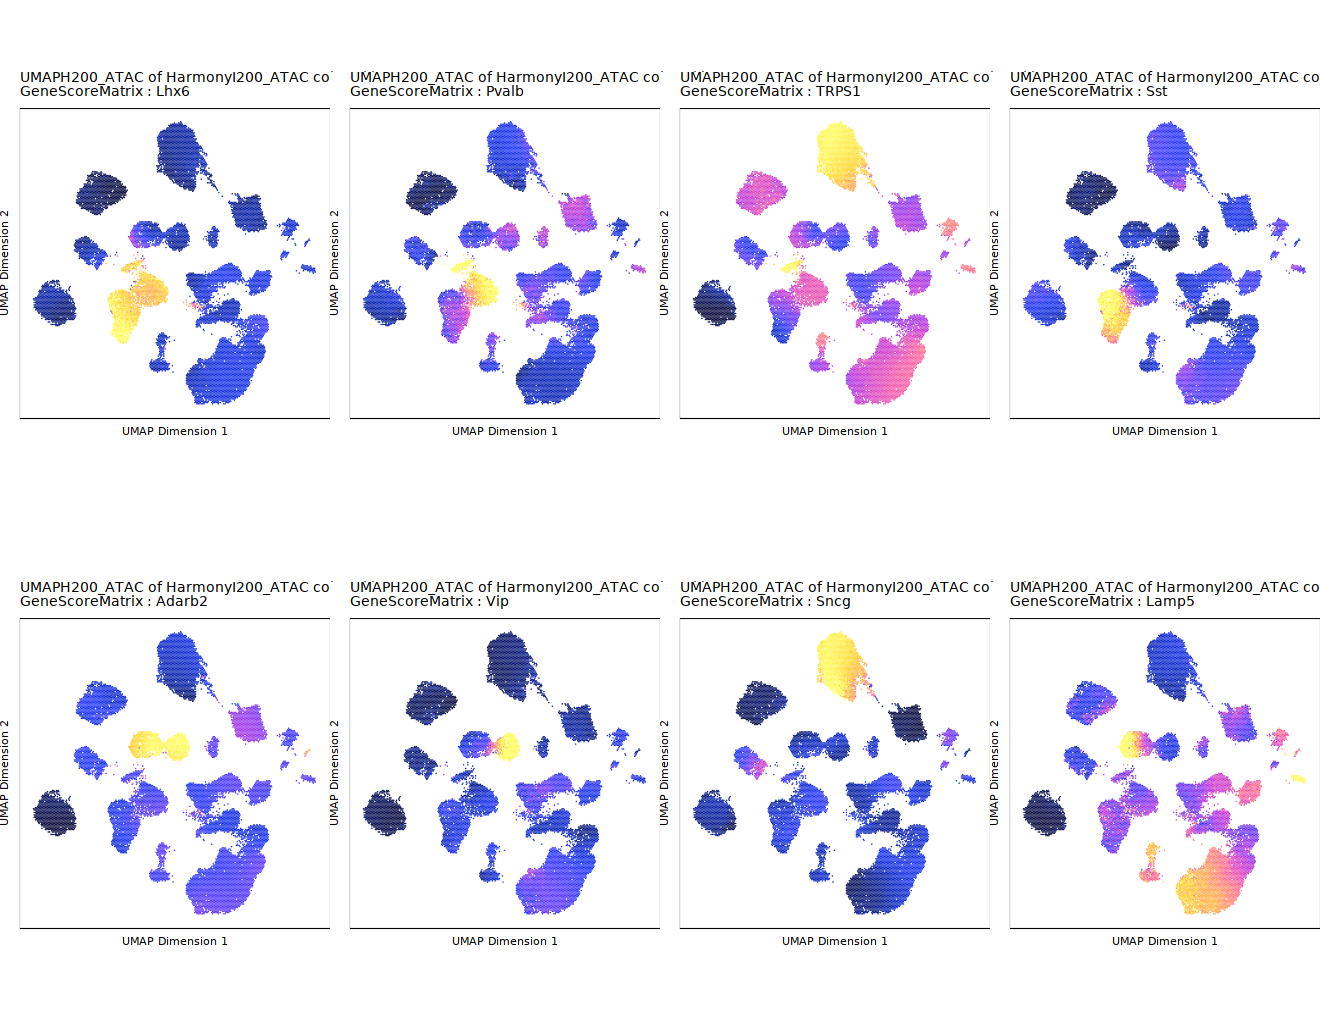

In [11]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'TRPS1', 'Sst', # MGE markers
                    'Adarb2', 'Vip', 'Sncg', 'Lamp5') # CGE markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

# Relabel cluster and call peaks

In [12]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
  'C1'='EXC',
  'C2'='EXC',
  'C3'='EXC',
  'C4'='EXC',
  'C5'='EXC',
  'C6'='EXC',
  'C7'='Drop', 
  'C8'='EXC',
  'C9'='Drop',
  'C10'='EXC',
  'C11'='EXC',
  'C12'='EXC',
  'C13'='EXC',
  'C14'='INH_SST',
  'C15'='INH_PVALB',
  'C16'='Drop',
  'C17'='INH_VIP',
  'C18'='INH_LAMP5',
  'C19'='Microglia',
  'C20'='Astro',
  'C21'='Drop',
  'C22'='Endo',
  'C23'='Oligo',
  'C24'='OPC',
  'C25'='Drop'
)

proj$Celltype1 <- mapLabels(proj$ClustersH200_ATAC, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Celltype1)


    Astro      Drop      Endo       EXC INH_LAMP5 INH_PVALB   INH_SST   INH_VIP 
     7472      1386      1276     18762      1503      2303      2392      1368 
Microglia     Oligo       OPC 
     3599      3028      2434 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-41da48d2dcff-Date-2022-01-07_Time-10-15-46.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-41da48d2dcff-Date-2022-01-07_Time-10-15-46.log



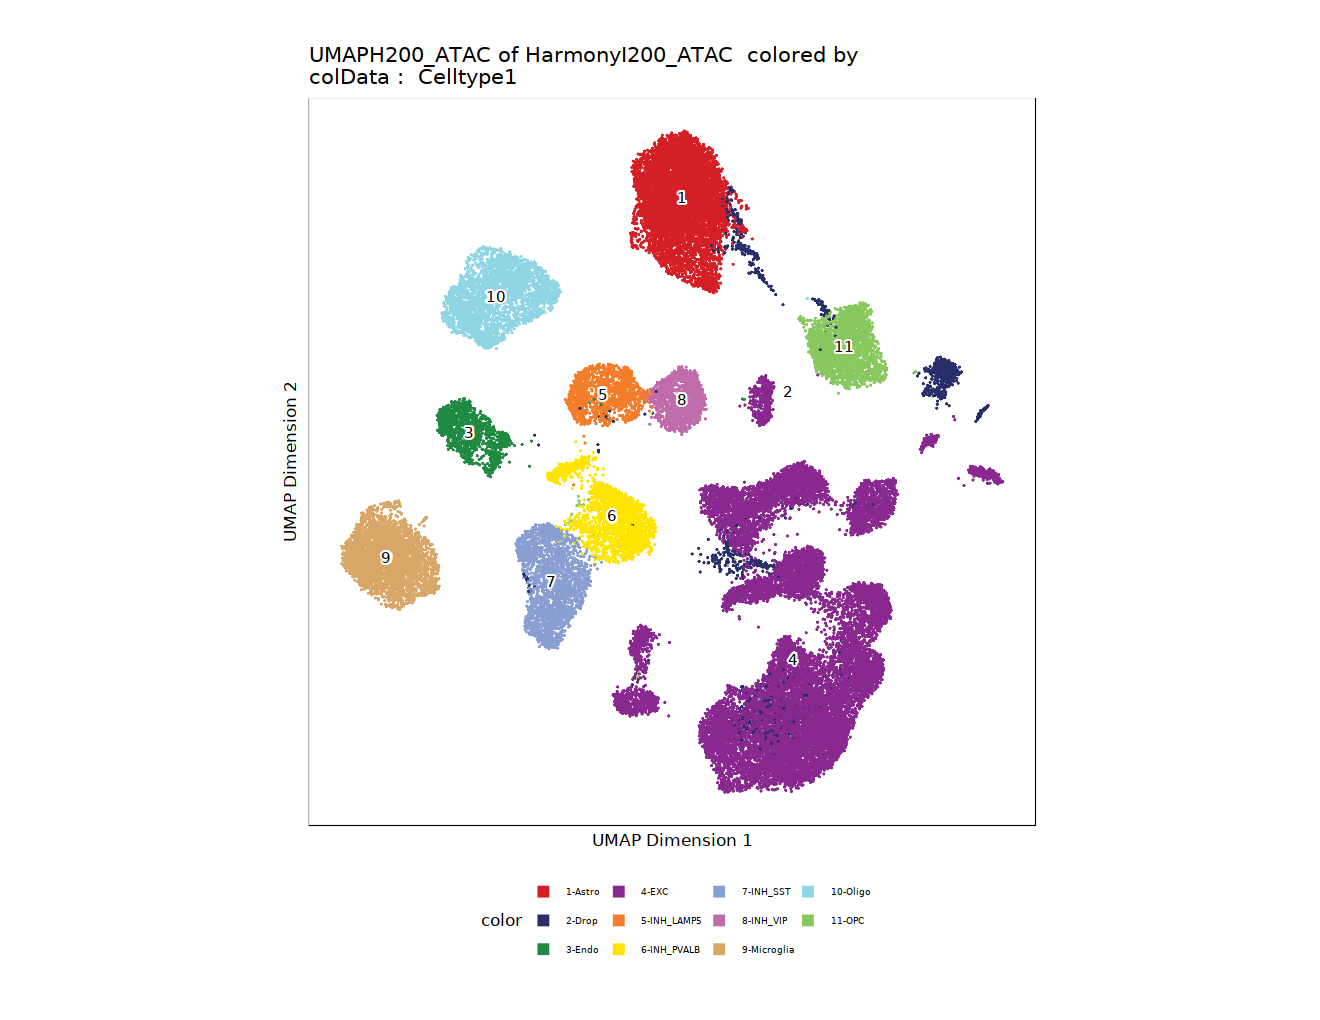

In [13]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Celltype1", embedding = "UMAPH200_ATAC")

p1

In [14]:
# drop the drop clusters, pull out the neuron cell types
ARCHDIR2=file.path(PROJDIR,'ArchR_snATAC_DLPFC_neuron')
neuronType = c( 'INH_LAMP5','INH_VIP', 'INH_SST', 'INH_PVALB', 'INH_PVALB','EXC')
idxSample <- BiocGenerics::which(proj$Celltype1 %in% neuronType )
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj, cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


      EXC INH_LAMP5 INH_PVALB   INH_SST   INH_VIP 
    18762      1503      2303      2392      1368 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Macaque_Multiome_DLPFC/data/tidy_data/ArchRProjects/ArchR_snATAC_DLPFC_neuron

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 3): Embeddings

Copying Other Files (2 of 3): IterativeLSI150_ATAC

Copying Other Files (3 of 3): IterativeLSI200_ATAC

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
 

In [15]:
# drop the drop clusters, pull out the glia cell types
ARCHDIR2=file.path(PROJDIR,'ArchR_snATAC_DLPFC_glia')
idxSample <- BiocGenerics::which(proj$Celltype1 %ni% c(neuronType, 'Drop'))
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


    Astro      Endo Microglia     Oligo       OPC 
     7472      1276      3599      3028      2434 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Macaque_Multiome_DLPFC/data/tidy_data/ArchRProjects/ArchR_snATAC_DLPFC_glia

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 3): Embeddings

Copying Other Files (2 of 3): IterativeLSI150_ATAC

Copying Other Files (3 of 3): IterativeLSI200_ATAC

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
   

In [16]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         